In [1]:
import json as js

In [8]:
from tqdm import tqdm

In [30]:
from graphviz import Digraph

In [95]:
from IPython.display import HTML, SVG, display

In [3]:
with open("./math_gen2.json", "r") as file:
    math_gen = js.load(file)

In [7]:
len(math_gen)

16118

In [6]:
math_gen[0]

{'advisors': [{'link': 'id.php?id=28320', 'name': 'Sholto Paul Smith'}],
 'deg_uni_year': 'Ph.D. University of Washington 2014',
 'id': '230516',
 'img_alt': 'Tree|UnitedStates',
 'name': 'Gautam  Sisodia',
 'students': []}

In [11]:
math_gen[1]

{'advisors': [{'link': 'id.php?id=47087', 'name': 'John Coulter McConnell'}],
 'deg_uni_year': 'Ph.D. University of Leeds 1981',
 'id': '28320',
 'img_alt': 'Tree|UnitedKingdom',
 'name': 'Sholto Paul Smith',
 'students': [{'link': 'id.php?id=28246', 'name': 'Mori, Izuru'},
  {'link': 'id.php?id=57845', 'name': 'Nyman, Adam'},
  {'link': 'id.php?id=28247', 'name': 'Perkins, Patrick'},
  {'link': 'id.php?id=230516', 'name': 'Sisodia, Gautam'},
  {'link': 'id.php?id=28248', 'name': 'Staniszkis, Joanna'},
  {'link': 'id.php?id=28249', 'name': 'Vancliff, Michaela'}],
 'uni': 'University of Leeds'}

Get unis

In [9]:
for person in tqdm(math_gen):
    deg_uni_year_split = person["deg_uni_year"].split(" ")
    person["uni"] = " ".join(deg_uni_year_split[1:-1])

100%|██████████| 16118/16118 [00:00<00:00, 337736.95it/s]


Get unis of students

In [ ]:
def find_in_math_gen(idnum):
    return [math]

In [12]:
not_found = []
multiple_found = []
for person in tqdm(math_gen):
    for student in person["students"]:
        # try to find the student in math gen
        student_math_gens = [p for p in math_gen if p["id"] == student["link"].split("=")[-1]]
        if len(student_math_gens) == 0:
            not_found.append(student)
        elif len(student_math_gens) > 1:
            multiple_found.append(student)
        else:
            student["uni"] = student_math_gens[0]["uni"]

100%|██████████| 16118/16118 [17:30<00:00, 15.34it/s]


In [15]:
len(not_found)

22147

In [16]:
len(multiple_found)

0

In [14]:
math_gen[1]

{'advisors': [{'link': 'id.php?id=47087', 'name': 'John Coulter McConnell'}],
 'deg_uni_year': 'Ph.D. University of Leeds 1981',
 'id': '28320',
 'img_alt': 'Tree|UnitedKingdom',
 'name': 'Sholto Paul Smith',
 'students': [{'link': 'id.php?id=28246',
   'name': 'Mori, Izuru',
   'uni': 'University of Washington'},
  {'link': 'id.php?id=57845',
   'name': 'Nyman, Adam',
   'uni': 'University of Washington'},
  {'link': 'id.php?id=28247',
   'name': 'Perkins, Patrick',
   'uni': 'University of Washington'},
  {'link': 'id.php?id=230516',
   'name': 'Sisodia, Gautam',
   'uni': 'University of Washington'},
  {'link': 'id.php?id=28248',
   'name': 'Staniszkis, Joanna',
   'uni': 'University of Washington'},
  {'link': 'id.php?id=28249',
   'name': 'Vancliff, Michaela',
   'uni': 'University of Washington'}],
 'uni': 'University of Leeds'}

Get advisor uni to student uni numbers

In [19]:
uni_to_uni = []
uni_to_uni_mult_found = []
for person in tqdm(math_gen):
    # get all unis of students
    student_unis = set([s["uni"] for s in person["students"] if "uni" in s.keys()])
    for student_uni in student_unis:
        # try to find uni pairing
        unis = [u for u in uni_to_uni if u["from"] == person["uni"] and u["to"] == student_uni]
        if len(unis) == 0:
            uni_to_uni.append({"from": person["uni"], "to": student_uni, "num": 1})
        elif len(unis) == 1:
            unis[0]["num"] += 1
        else:
            uni_to_uni_mult_found.append([person, student_uni])

100%|██████████| 16118/16118 [00:02<00:00, 6420.32it/s]


In [24]:
len(uni_to_uni_mult_found)

0

In [27]:
uni_to_uni.sort(key = lambda x: x["num"], reverse = True)

In [28]:
uni_to_uni[:10]

[{'from': 'Massachusetts Institute of Technology',
  'num': 33,
  'to': 'Massachusetts Institute of Technology'},
 {'from': 'Lomonosov Moscow State University',
  'num': 32,
  'to': 'Lomonosov Moscow State University'},
 {'from': '', 'num': 29, 'to': ''},
 {'from': 'ETH Zürich', 'num': 28, 'to': 'ETH Zürich'},
 {'from': 'Universiteit van Amsterdam',
  'num': 25,
  'to': 'Universiteit van Amsterdam'},
 {'from': 'Université Pierre-et-Marie-Curie - Paris VI',
  'num': 21,
  'to': 'Université Pierre-et-Marie-Curie - Paris VI'},
 {'from': 'University of Cambridge',
  'num': 20,
  'to': 'University of Cambridge'},
 {'from': 'Katholieke Universiteit Leuven',
  'num': 20,
  'to': 'Katholieke Universiteit Leuven'},
 {'from': 'Technische Universiteit Eindhoven',
  'num': 19,
  'to': 'Technische Universiteit Eindhoven'},
 {'from': 'Technische Universiteit Delft',
  'num': 18,
  'to': 'Technische Universiteit Delft'}]

In [29]:
len(uni_to_uni)

6055

get all unis

In [31]:
unis = set([p["uni"] for p in math_gen])

make graph viz

In [106]:
dot = Digraph(engine = "neato")
dot.graph_attr["rankdir"] = "LR"

In [107]:
# for uni in unis:
#    dot.node(uni)

In [108]:
for edge in uni_to_uni[:50]:
    dot.edge(edge["from"], edge["to"])

In [109]:
dot.format = 'svg'

In [110]:
style = "<style>svg{width:50% !important;height:50% !important;}</style>"
HTML(style)

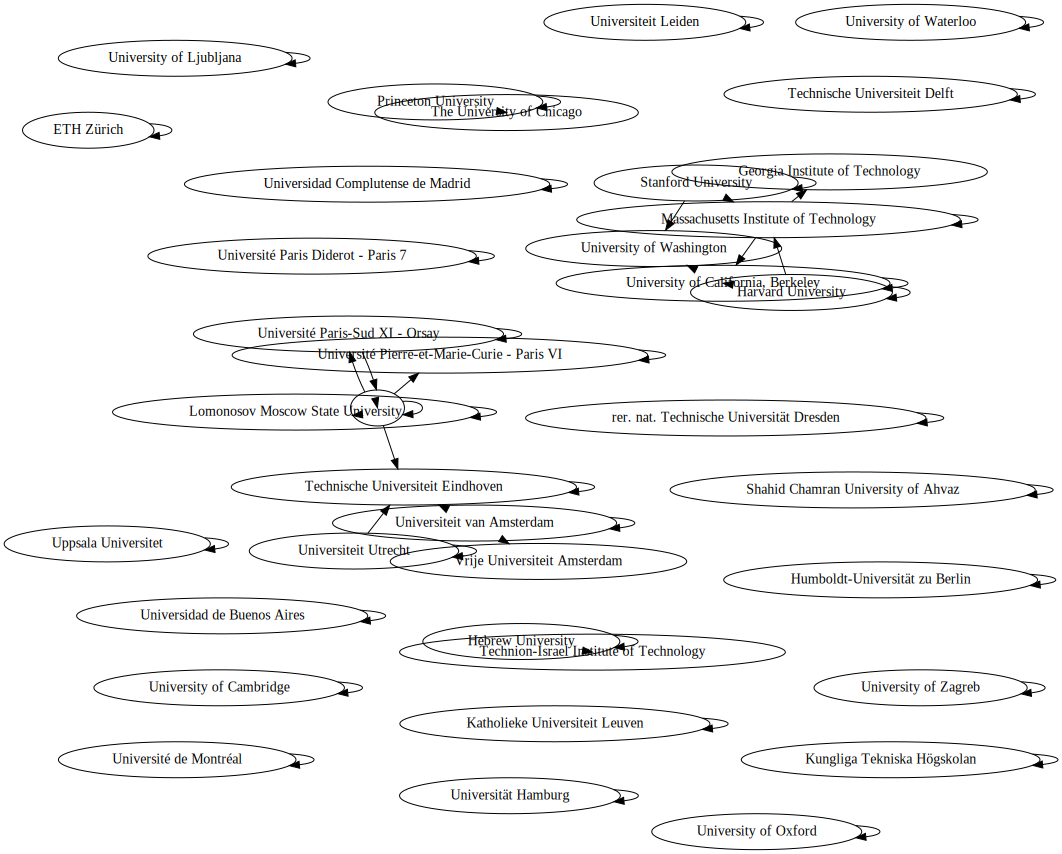

In [111]:
dot